In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pdColegio = pd.read_csv("https://raw.githubusercontent.com/advinstai/python-datascience/master/csv/College.csv")

print(pdColegio.info())
print(pdColegio.describe())
print(pdColegio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB
None
               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.

In [10]:
fig = px.scatter(pdColegio, x="Apps", y="Accept")
fig.show()

In [11]:
print(pdColegio.corr(method="pearson"))

                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.33146

In [12]:
fig = px.histogram(pdColegio, x="Apps", nbins = 10)
print(type(fig))
fig.show()

<class 'plotly.graph_objs._figure.Figure'>


/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



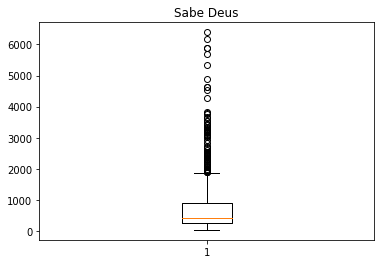

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sabe Deus')
ax1.boxplot(pdColegio["Enroll"])
fig1.show()

/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



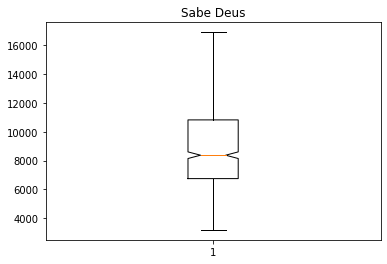

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sabe Deus')
ax1.boxplot(pdColegio["Expend"], notch=True, showfliers=False)
fig1.show()

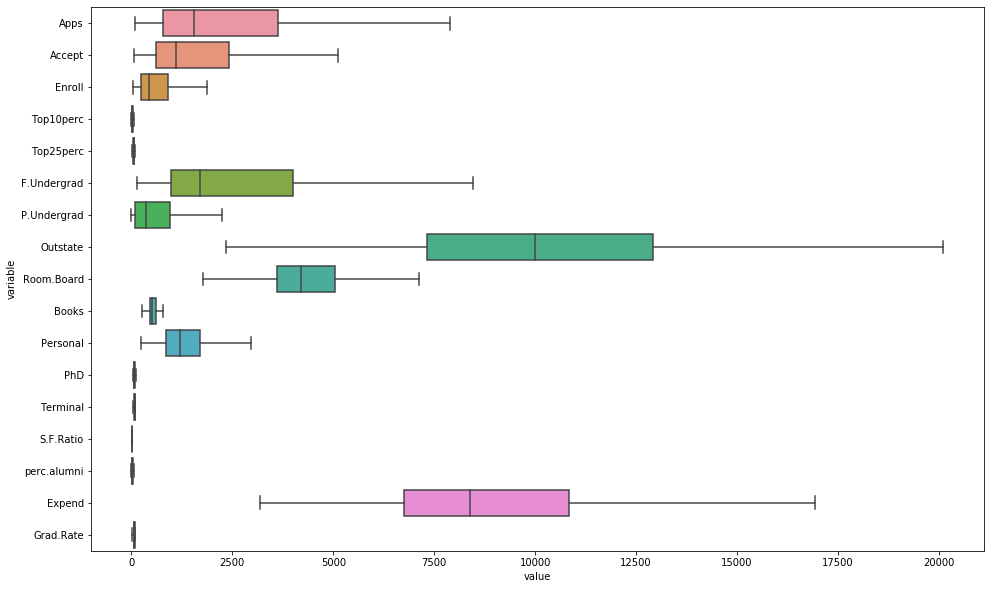

In [15]:
qntCols = pdColegio.select_dtypes([np.number])

plt.figure(figsize=(16, 10))
ax = sns.boxplot(y="variable", x="value", orient="h", data=pd.melt(qntCols), showfliers=False)

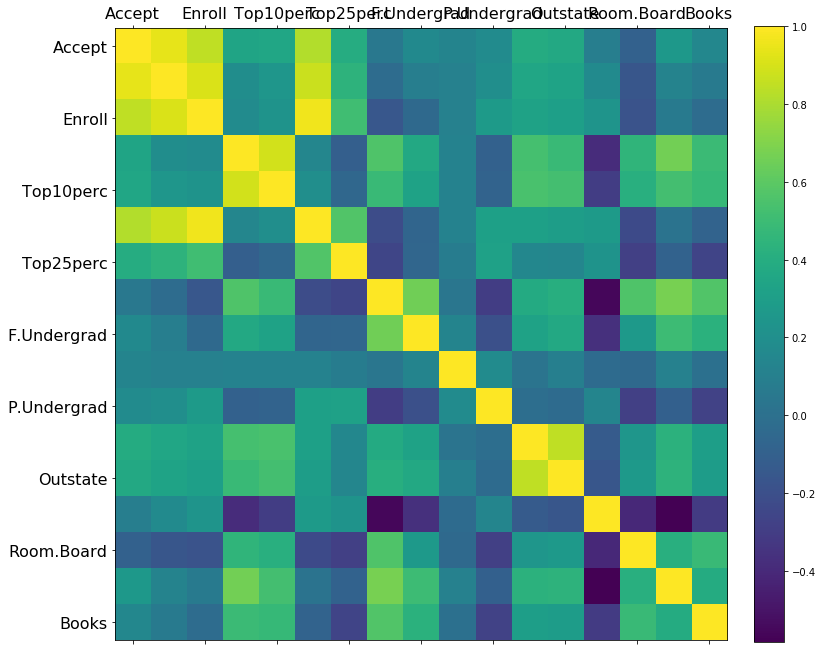

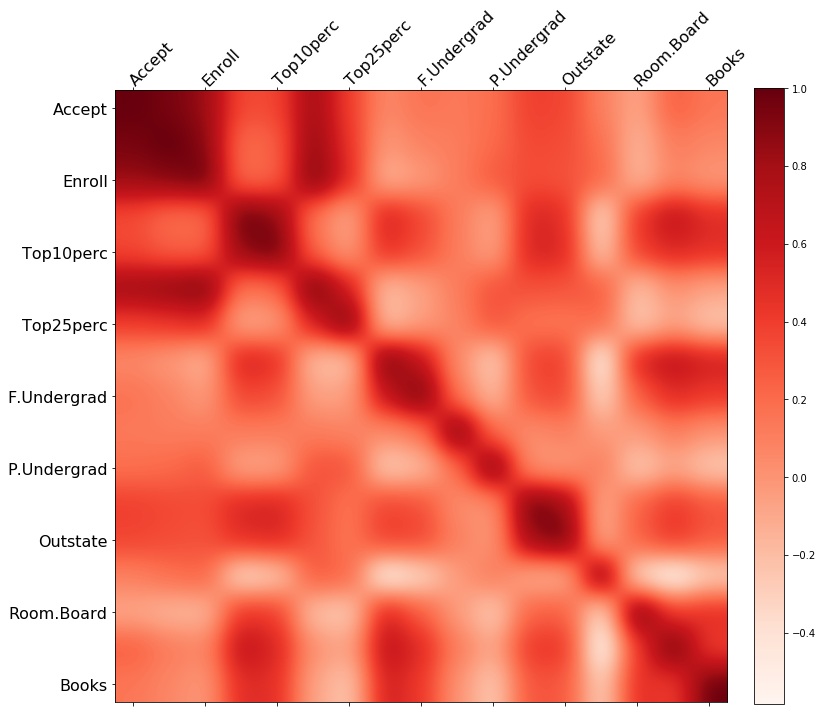

In [65]:
#qntCols = 

fig, ax = plt.subplots(figsize=(12,12))

#ax.matshow(qntCols.corr())

labelsItens = list((pdColegio.select_dtypes([np.number])).columns)

cax = ax.matshow(pdColegio.corr(), interpolation='nearest')
plt.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_xticklabels(labelsItens)
ax.set_yticklabels(labelsItens)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

##COMA NOVO PLOT

fig, ax = plt.subplots(figsize=(12,12))
cax = ax.matshow(pdColegio.corr(), interpolation='gaussian', cmap=plt.cm.Reds)
plt.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_xticklabels(labelsItens)
ax.set_yticklabels(labelsItens)

plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="left", va="center",rotation_mode="anchor")
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [66]:
pdTitanic = pd.read_csv("https://raw.githubusercontent.com/advinstai/python-datascience/master/Exercicios/titanic/train.csv")
px.histogram(pdTitanic, x = "Sex")

matplotlib.axes._subplots.AxesSubplot

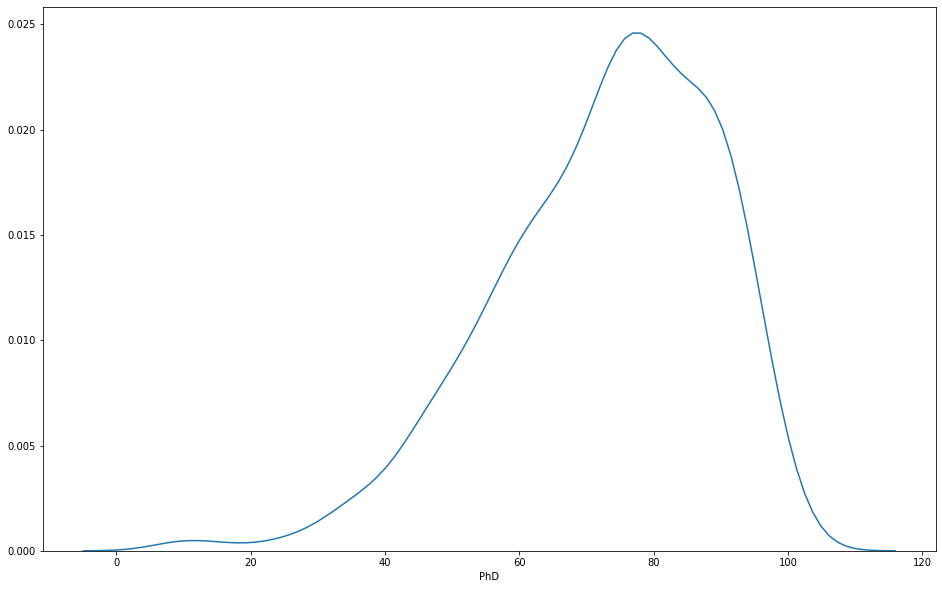

In [94]:
plt.figure(figsize=(16, 10))
fig = sns.distplot(pdColegio["PhD"], hist=False)
type(fig)

matplotlib.axes._subplots.AxesSubplot

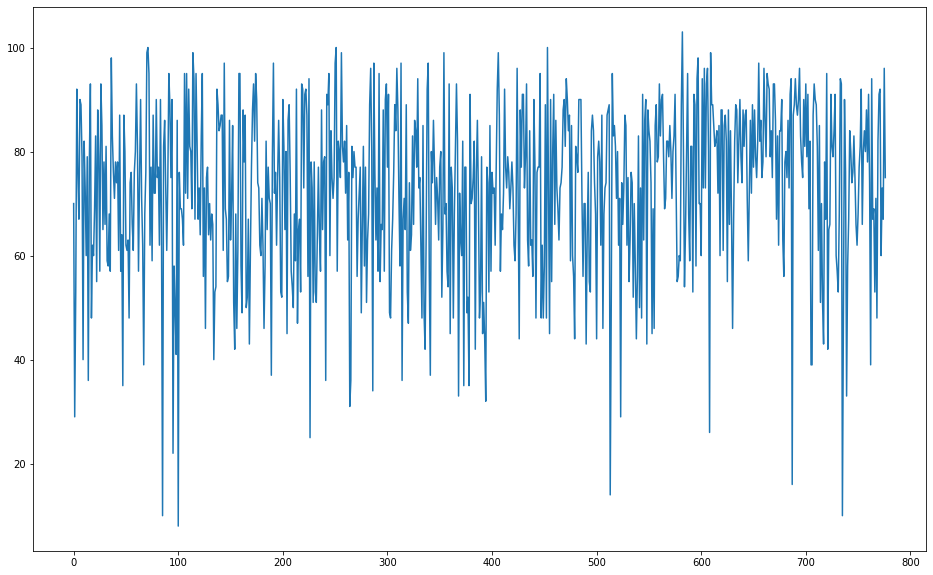

In [96]:
plt.figure(figsize=(16, 10))
fig = sns.lineplot(data=pdColegio["PhD"])
type(fig)

seaborn.axisgrid.PairGrid

<Figure size 1152x720 with 0 Axes>

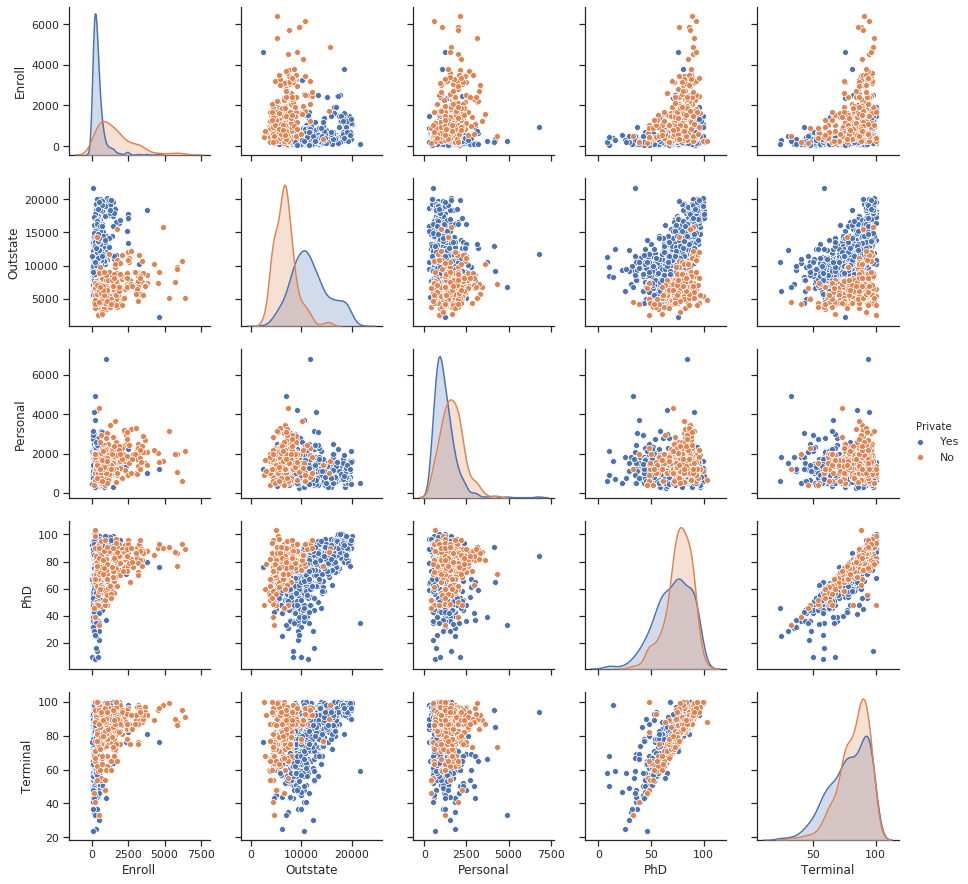

In [137]:
plt.figure(figsize=(16, 10))
sns.set(style="ticks")

pdNew = pdColegio.drop(pdColegio.columns.difference(["PhD","Enroll", "Outstate", "Personal", "Terminal", "Private"]),1)

fig = sns.pairplot(data=pdNew, hue="Private")
type(fig)